In [1]:
import json
import numpy as np
import shutil
import glob
from tqdm import tqdm
import pandas as pd
import unidecode
import os
import subprocess
import  tarfile
import xml.etree.ElementTree as ET
import ast
import zipfile
import datetime

In [2]:
txt_file = '/Users/bina/Documents/MA1/ADACODE/MovieSummaries/plot_summaries.txt'

# Count the number of files, which represents the number of articles
num_articles = len(txt_file)

print("Total number of articles:", num_articles)

Total number of articles: 67


In [3]:
data = []


with open(txt_file, 'r', encoding='utf-8') as file:
    for line in file:
        if line[:6].isdigit() and len(line) >= 6:
            wikipedia_id = line[:7]
            summary = line[8:]
            data.append([wikipedia_id, summary])
            
df = pd.DataFrame(data, columns=['wikipedia_id', 'summary'])

df.head()

output_file = 'plot_summaries.csv'
df.to_csv(output_file, index=False)

output_directory = '/Users/bina/Documents/MA1/ADACODE/MovieSummaries/'
output_file_path = os.path.join(output_directory, output_file)
df.to_csv(output_file_path, index=False)

            

In [4]:
print(df)

      wikipedia_id                                            summary
0          2389009  \tShlykov, a hard-working taxi driver and Lyos...
1          3118633  \tThe nation of Panem consists of a wealthy Ca...
2          2066373  \tPoovalli Induchoodan  is sentenced for six y...
3          2231378  The Lemon Drop Kid , a New York City swindler,...
4         595909\t  eventh-day Adventist Church pastor Michael Cha...
...            ...                                                ...
41743      3480848  \tThe story is about Reema , a young Muslim sc...
41744      1096473  In 1928 Hollywood, director Leo Andreyev  look...
41745      3510201  \tAmerican Luthier focuses on Randy Parsons’ t...
41746      8628195  Abdur Rehman Khan , a middle-aged dry fruit se...
41747      6040782  1940 - Operation Dynamo has just taken place. ...

[41748 rows x 2 columns]


In [5]:
df_sorted = df.sort_values(by='wikipedia_id')

# Display the sorted DataFrame (optional)
print(df_sorted)

# To save the sorted DataFrame to a CSV file
# Replace 'sorted_output.csv' with the desired output file name
# sorted_output_file = 'sorted_output.csv'
# df_sorted.to_csv(sorted_output_file, index=False)

      wikipedia_id                                            summary
14307      1000005  \tFur trapper Jean La Bête  paddles his canoe ...
28407      1000217  \tSet in Shelbyville, Tennessee in 1978, the f...
4045       1000277  \tThe film begins in 2001, when backpackers Jo...
12160      1000326  \tThe story takes place during the period of t...
21224      1000405  \tMurder, homosexuality, nymphomania, and sadi...
...            ...                                                ...
25680      9996003  The story starts with Lord Ting Chung  getting...
25924      9998022  By 1930, Evaristo, a humble worker who lives n...
30736      9998295  When San Francisco private detective Sam Spade...
33459      9998297  The film tells the story of a real life fan of...
22339      9999280  Marcelo makes a living as a painter in a Bueno...

[41748 rows x 2 columns]


In [6]:
print(df.loc[2]['summary'])

	Poovalli Induchoodan  is sentenced for six years prison life for murdering his classmate. Induchoodan, the only son of Justice Maranchery Karunakara Menon  was framed in the case by Manapally Madhavan Nambiar  and his crony DYSP Sankaranarayanan  to take revenge on idealist judge Menon who had earlier given jail sentence to Manapally in a corruption case. Induchoodan, who had achieved top rank in Indian Civil Service loses the post and Manapally Sudheeran ([[Saikumar  enters the list of civil service trainees. We learn in flashback that it was Ramakrishnan  the son of Moopil Nair , who had actually killed his classmate. Six years passes by and Manapally Madhavan Nambiar, now a former state minister, is dead and Induchoodan, who is all rage at the gross injustice meted out to him - thus destroying his promising life, is released from prison. Induchoodan thwarts Manapally Pavithran  from performing the funeral rituals of Nambiar at Bharathapuzha. Many confrontations between Induchoodan 

In [7]:
num_lines = len(df)

# Print the result
print(f"Number of lines in the DataFrame: {num_lines}")

Number of lines in the DataFrame: 41748


In [8]:
import csv

tsv_file = '/Users/bina/Documents/MA1/ADACODE/MovieSummaries/movie.metadata.tsv'

csv_file = os.path.join('/Users/bina/Documents/MA1/ADACODE/MovieSummaries/', 'movie.csv')

with open(tsv_file, 'r', newline='') as tsvfile, open(csv_file, 'w', newline='') as csvfile:
    tsvreader = csv.reader(tsvfile, delimiter='\t')
    csvwriter = csv.writer(csvfile)

    for row in tsvreader:
        csvwriter.writerow(row)
        



In [9]:
def extract_year(date_string):
    return date_string.split('-')[0] if '-' in date_string else date_string


In [10]:
input_csv ='/Users/bina/Documents/MA1/ADACODE/MovieSummaries/movie.csv'
max_year = None
min_year = None
with open(input_csv, 'r') as csv_file:
    reader = csv.reader(csv_file)

    for row in reader:
        # Assuming the "2001" column is the fourth column (index 3)
        year = extract_year(row[3])

        if year is not None:
            # Update max and min years if year is not None
            if max_year is None or year > max_year:
                max_year = year
            if year >= '1880':
                if min_year is None or year < min_year:
                    min_year = year

print(f"Maximum year in the fourth column: {max_year}")
print(f"Minimum year in the fourth column: {min_year}")

Maximum year in the fourth column: 2016
Minimum year in the fourth column: 1888


In [35]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
csv_file = os.path.join('/Users/bina/Documents/MA1/ADACODE/MovieSummaries/', 'plot_summaries.csv')
df = pd.read_csv(csv_file)
df.head(100)

x= np.arange(len(df))

# Define the word you want to search for
target_word = "terrorism"

# Create a new column that checks if the target word appears in each plot summary
df['contains_target_word'] = df['summary'].str.lower().str.contains(target_word)

# Count how many movies contain the target word
count_movies_with_word = df['contains_target_word'].sum()

# Print the count
print(f"Total movies containing '{target_word}': {count_movies_with_word}")

Total movies containing 'terrorism': 89


In [36]:
target_word = "terrorist"
df['contains_target_word'] = df['summary'].str.lower().str.contains(target_word)
count_movies_with_word = df['contains_target_word'].sum()
print(f"Total movies containing '{target_word}': {count_movies_with_word}")

Total movies containing 'terrorist': 546


In [37]:
target_word = "extremist"
df['contains_target_word'] = df['summary'].str.lower().str.contains(target_word)
count_movies_with_word = df['contains_target_word'].sum()
print(f"Total movies containing '{target_word}': {count_movies_with_word}")

Total movies containing 'extremist': 47


In [38]:
target_word = "radical"
df['contains_target_word'] = df['summary'].str.lower().str.contains(target_word)
count_movies_with_word = df['contains_target_word'].sum()
print(f"Total movies containing '{target_word}': {count_movies_with_word}")

Total movies containing 'radical': 200


In [39]:
target_word = "counterterrorism"
df['contains_target_word'] = df['summary'].str.lower().str.contains(target_word)
count_movies_with_word = df['contains_target_word'].sum()
print(f"Total movies containing '{target_word}': {count_movies_with_word}")

Total movies containing 'counterterrorism': 1


In [16]:
target_word = "jihad"
df['contains_target_word'] = df['summary'].str.lower().str.contains(target_word)
count_movies_with_word = df['contains_target_word'].sum()
print(f"Total movies containing '{target_word}': {count_movies_with_word}")

Total movies containing 'jihad': 20


In [17]:
target_word = "hostage"
df['contains_target_word'] = df['summary'].str.lower().str.contains(target_word)
count_movies_with_word = df['contains_target_word'].sum()
print(f"Total movies containing '{target_word}': {count_movies_with_word}")

Total movies containing 'hostage': 892


In [18]:
target_word = "bombing"
df['contains_target_word'] = df['summary'].str.lower().str.contains(target_word)
count_movies_with_word = df['contains_target_word'].sum()
print(f"Total movies containing '{target_word}': {count_movies_with_word}")

Total movies containing 'bombing': 289


In [19]:
target_word = "al-qaeda"
df['contains_target_word'] = df['summary'].str.lower().str.contains(target_word)
count_movies_with_word = df['contains_target_word'].sum()
print(f"Total movies containing '{target_word}': {count_movies_with_word}")

Total movies containing 'al-qaeda': 10


In [20]:
target_word = "terror"
df['contains_target_word'] = df['summary'].str.lower().str.contains(target_word)
count_movies_with_word = df['contains_target_word'].sum()
print(f"Total movies containing '{target_word}': {count_movies_with_word}")

Total movies containing 'terror': 1247


In [54]:
# List of target words
target_words = ["Terrorism", "Terrorist", "Terrorists", "Jihad", "Extremism", "Extremist", "Attacks", "Attack", "Bombs", "Bombing", "Bombers", "Hijack", "Hijacking", "Kidnap", "Kidnapping", "Counterterrorism", "Counterterrorist", "Radicalization", "Radicalized", "Security Threat", "Political Violence", "Suicide Bomber", "War on Terror", "Homeland Security", "National Security", "Intelligence Agencies", "Counterinsurgency", "Terrorist Cells", "Radical Ideology", "Terrorist Plot", "Terrorist Organization", "Hostage Crisis", "Terrorism Investigation", "Counterterrorist Operation", "Radical", "Guerrilla Warfare", "Insurgency", "Terror Threat", "Covert Operations", "Political Unrest", "Martyrdom", "Cyberterrorism", "Terrorism Financing", "Violent Extremism", "Terrorist Recruitment", "Suicide Attacks", "Terrorist Sleeper Cells", "Counterterror Measures", "Clandestine Activities", "Security Intelligence"]

# Convert the list of target words to lowercase for case-insensitive matching
target_words_lower = [word.lower() for word in target_words]

# Create a new column in the DataFrame for each target word
for word in target_words_lower:
    df[f'contains_{word}'] = df['summary'].str.lower().str.contains(word)

# Calculate the total count of movies that contain any of the target words
total_count_movies_with_words = df[[f'contains_{word}' for word in target_words_lower]].any(axis=1).sum()

print(f"Total movies containing any of the specified words: {total_count_movies_with_words}")


Total movies containing any of the specified words: 8495


In [65]:
# List of target words
target_words = ["Terrorism", "Terrorist", "Terrorists", "Jihad", "Extremism", "Extremist", "Attacks", "Attack", "Bombs", "Bombing", "Bombers", "Hijack", "Hijacking", "Kidnap", "Kidnapping", "Counterterrorism", "Counterterrorist", "Radicalization", "Radicalized", "Security Threat", "Political Violence", "Suicide Bomber", "War on Terror", "Homeland Security", "National Security", "Intelligence Agencies", "Counterinsurgency", "Terrorist Cells", "Radical Ideology", "Terrorist Plot", "Terrorist Organization", "Hostage Crisis", "Terrorism Investigation", "Counterterrorist Operation", "Radical", "Guerrilla Warfare", "Insurgency", "Terror Threat", "Covert Operations", "Political Unrest", "Martyrdom", "Cyberterrorism", "Terrorism Financing", "Violent Extremism", "Terrorist Recruitment", "Suicide Attacks", "Terrorist Sleeper Cells", "Counterterror Measures", "Clandestine Activities", "Security Intelligence"]

# Convert the list of target words to lowercase for case-insensitive matching
target_words_lower = [word.lower() for word in target_words]

# Create a new column 'contains_target_word' in the DataFrame
df['contains_target_word'] = df[[f'contains_{word}' for word in target_words_lower]].any(axis=1)

# Calculate the total count of movies that contain any of the target words
total_count_movies_with_words = df['contains_target_word'].sum()

print(f"Total movies containing any of the specified words: {total_count_movies_with_words}")


KeyError: "['contains_security intelligence'] not in index"

"Terrorism", "Terrorist", "Terrorists", "Jihad", "Extremism", "Extremist", "Attacks", "Attack", "Bombs", "Bombing", "Bombers", "Hijack", "Hijacking", "Kidnap", "Kidnapping", "Counterterrorism", "Counterterrorist", "Radicalization", "Radicalized", "Security Threat", "Political Violence", "Suicide Bomber", "War on Terror", "Homeland Security", "National Security", "Intelligence Agencies", "Counterinsurgency", "Terrorist Cells", "Radical Ideology", "Terrorist Plot", "Terrorist Organization", "Hostage Crisis", "Terrorism Investigation", "Counterterrorist Operation", "Radical", "Guerrilla Warfare", "Insurgency", "Terror Threat", "Covert Operations", "Political Unrest", "Martyrdom", "Cyberterrorism", "Terrorism Financing", "Violent Extremism", "Terrorist Recruitment", "Suicide Attacks", "Terrorist Sleeper Cells", "Counterterror Measures", "Clandestine Activities", "Security Intelligence"

In [55]:

csv_file_movies = os.path.join('/Users/bina/Documents/MA1/ADACODE/', 'movie_sorted.csv')
df_movies = pd.read_csv(csv_file_movies)
columns = [
    'wikipedia_id', 'Freebase movie ID', 'Movie name', 'date', 'Movie box office revenue', 
    'Movie runtime', 'Movie languages', 'Movie countries', 'Movie genres'
]
df_movies = pd.DataFrame(df_movies, columns=columns)


In [56]:
df_movies.columns


Index(['wikipedia_id', 'Freebase movie ID', 'Movie name', 'date',
       'Movie box office revenue', 'Movie runtime', 'Movie languages',
       'Movie countries', 'Movie genres'],
      dtype='object')

In [57]:
df.columns

Index(['wikipedia_id', 'summary', 'contains_target_word', 'contains_terrorism',
       'contains_terrorist', 'contains_terrorists', 'contains_jihad',
       'contains_extremism', 'contains_extremist', 'contains_attacks',
       'contains_attack', 'contains_bombs', 'contains_bombing',
       'contains_bombers', 'contains_hijack', 'contains_hijacking',
       'contains_kidnap', 'contains_kidnapping', 'contains_counterterrorism',
       'contains_counterterrorist', 'contains_radicalization',
       'contains_radicalized', 'contains_security threat',
       'contains_political violence', 'contains_suicide bomber',
       'contains_war on terror', 'contains_homeland security',
       'contains_national security', 'contains_intelligence agencies',
       'contains_counterinsurgency', 'contains_terrorist cells',
       'contains_radical ideology', 'contains_terrorist plot',
       'contains_terrorist organization', 'contains_hostage crisis',
       'contains_terrorism investigation',
       '

In [58]:
merged_df = pd.merge(df_movies, df, on='wikipedia_id', how='inner')



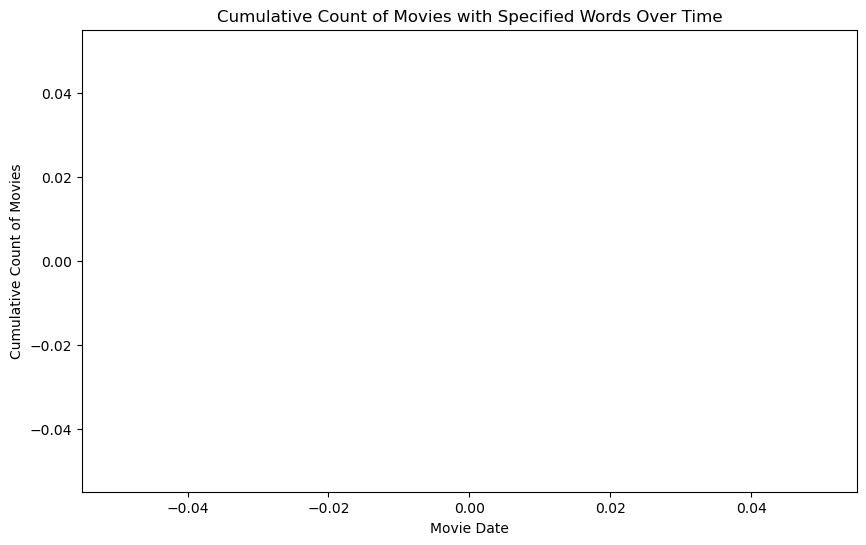

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df contains 'movie_date' and 'contains_target_word' columns
# If your dataframe has different column names, adjust accordingly.

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(merged_df['date'], merged_df['contains_target_word'].cumsum(), marker='o', linestyle='-')
plt.title('Cumulative Count of Movies with Specified Words Over Time')
plt.xlabel('Movie Date')
plt.ylabel('Cumulative Count of Movies')
plt.show()
